<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_spd_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
try: 
    df = pd.read_csv("/datasets/insurance.csv")

except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [ ]:
df.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


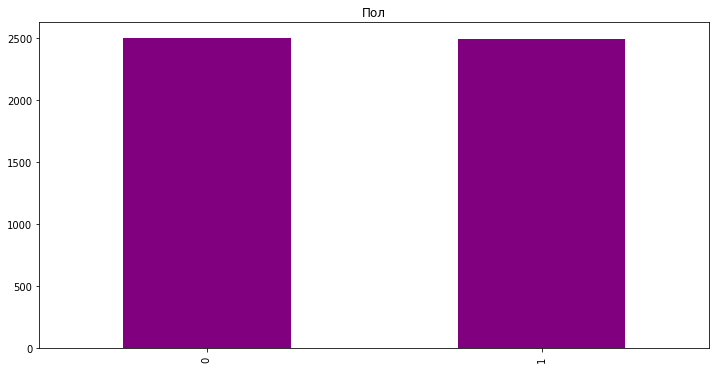

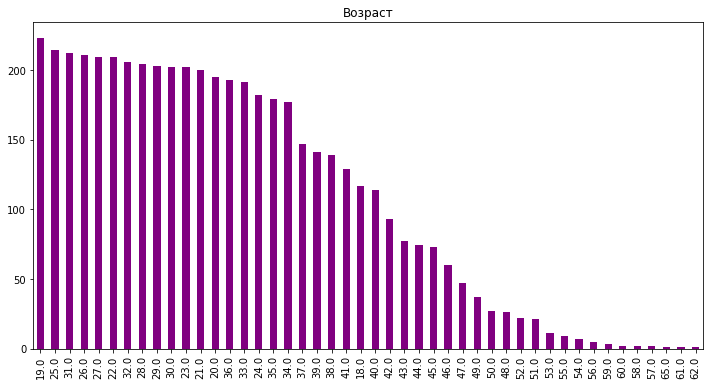

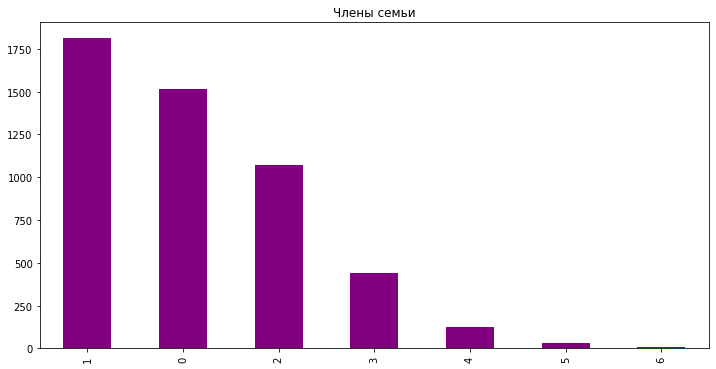

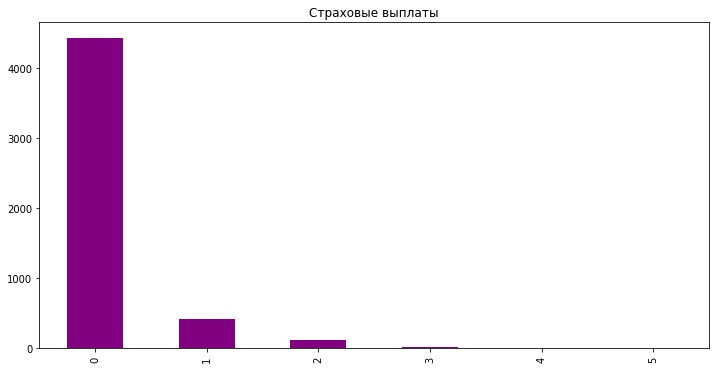

In [ ]:
spisok = ['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты']
dependencies = ['Зарплата']

for i in spisok:
    values = df[i].value_counts()
    plt.figure(figsize=(12,6))
    values.plot(kind = 'bar', color = 'purple')
    plt.title(i)
    plt.show()

* пропусков нет
* типы данных корректны
* женщин и мужчин среди клиентов почти одинаковое около 2500
* от 19 до 41 года составляет большая часть людей, обратившихся в страховую компанию  
* чаще всего клиенты имеют семью из 1-го члена семьи/не имеют

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Если в задаче линеной регрессии $a = Xw$ умножить $X (M, N)$ на обратимую матрицу $Z$, размерности $(N, N)$, то при вычислении весов $w = (X^T X)^{-1} X^T y$ предсказания $a$ не дожны изменится.

**Ответ:** не изменится. 

**Обоснование:**

Новая матрица признаков:

$$X' = XP$$

Таким образом новый вектор весов $w'$ можем расчитать следующим образом:

$$w' = ((XP)^{T} XP)^{-1} (XP)^{T} y = \\ 
     = (P^{T}X^{T} XP)^{-1}P^{T}X^{T}y  = \\ 
     = P^{-1} (X^{T} X)^{-1} (P^{T})^{-1} P^{T}X^{T}y = \\ 
     = P^{-1} w, $$ 
     
так как внутри формулы можно выделить формулу расчета $w$, а

$$(P^{T})^{-1} P^{T} = Е = 1$$


Таким образом:

$$ a' = X'w' = XPP^{-1}w = XEw = Xw= a $$

Тут можно отметить, что, если любую матрицу Р умножить на единичную (или наоборот), получится эта же матрица Р. Т.е., матрицы будут одинаковыми, а качество линейной регрессии не изменится.

**Вывод:** Предсказания модели не изменились, значит, и качество осталось тем же.


## Алгоритм преобразования

**Алгоритм**

1) методом *make_spd_matrix* создам случайную матрицу A

2) методом *np.linalg.inv()* проверю матрицу А на обратимость и получаем $А^{-1}$. Если матрица А провалила тест на обратимость, необходимо создать новую случайную матрицу 

Так как надо закодировать данные клиентов, матрица А будет ключом кодирования. 

3) умножаем матрицу признаков X на полученную матрицу А и получаем матрицу B с закодированными данными о клиентах:

$$ B = X @ A $$

4) После этого перейду к обучению модели линейной регрессии

**Обоснование**

алгоритм позволит защитить персональную информацию клиентов и при этом не должен повлиять на работу модели

## Проверка алгоритма

In [ ]:
features = df.drop('Страховые выплаты',axis=1)
target = df['Страховые выплаты']
features.shape, target.shape

((5000, 4), (5000,))

In [ ]:
features_matrix = features.values
features_matrix

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

создаем случайную матрицу методом make 

In [ ]:
random_matrix = make_spd_matrix(n_dim=4, random_state=123)
random_matrix

array([[ 0.47243659,  0.36201499,  0.23624413, -0.20756552],
       [ 0.36201499,  3.26723888,  1.70966795, -0.39838002],
       [ 0.23624413,  1.70966795,  1.32704651, -0.17893753],
       [-0.20756552, -0.39838002, -0.17893753,  0.35460046]])

проверяем ее на обратимость

In [ ]:
np.linalg.inv(random_matrix)

array([[ 2.97675307,  0.09601407, -0.43363796,  1.63149048],
       [ 0.09601407,  1.02415391, -1.2595126 ,  0.57122764],
       [-0.43363796, -1.2595126 ,  2.39108163, -0.46226306],
       [ 1.63149048,  0.57122764, -0.46226306,  4.18355526]])

=>матрица обратима.  

In [ ]:
encoded_matrix = features_matrix @ random_matrix
encoded_matrix

array([[11732.81637505, 84933.45064883, 65891.66076973, -8891.48812605],
       [ 8993.72209566, 65117.27663171, 50506.23330695, -6817.59709104],
       [ 4971.62518218, 35997.77683511, 27917.55715724, -3769.24118958],
       ...,
       [ 8015.50120409, 58022.29145405, 45020.71229678, -6073.24072949],
       [ 7732.99714812, 55977.18802921, 43431.73312289, -5859.16541635],
       [ 9601.91300269, 69503.96501156, 53926.01646352, -7275.87139908]])

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target,train_size=0.75,test_size=0.25,random_state=123)

In [ ]:
model_raw = LinearRegression()
model_raw.fit(features_train, target_train)
predictions_raw = model_raw.predict(features_valid)
r2_raw = r2_score(target_valid, predictions_raw)
print('до преобразования данных:', r2_raw)

до преобразования данных: 0.43018469990932917


In [ ]:
features_train_encoded, features_valid_encoded, target_train_encoded, target_valid_encoded = train_test_split(
    encoded_matrix, target, train_size=0.75, test_size=0.25, random_state=123)

In [ ]:
model_encoded = LinearRegression()
model_encoded.fit(features_train_encoded, target_train_encoded)
predictions_encoded = model_encoded.predict(features_valid_encoded)
r2_encoded = r2_score(target_valid_encoded, predictions_encoded)
print('после преобразования данных:', r2_encoded)

после преобразования данных: 0.4301846999099589


Метрики почти идентичны, а это значит, что качество модели линейной регрессии после преобразования данных не изменилось.

Во время проекта мной было сделано:
* загружены и проанализированы данные
* с помощью математических доказательств я сделала вывод, что качетсво линейной регрессии не изменится, если умножать признаки на обратимую матрицу
* сделала алгоритм преобразования данных
* протестировала алгоритм 
* сделала доказательство, что качество модели линейной регресси не изменится после преобразования данных 
